In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_transform_hyperbola(image, a_range, b_range):
    height, width = image.shape
    max_a = max(a_range)
    max_b = max(b_range)
    accumulator = np.zeros((height, width, max_a, max_b), dtype=np.uint64)

    edges = cv2.Canny(image, 50, 150)

    for y in range(height):
        for x in range(width):
            if edges[y, x] > 0:
                for a in a_range:
                    for b in b_range:
                        for theta in range(0, 360):
                            h = int(x - a * np.cos(np.radians(theta)))
                            k = int(y - b * np.sin(np.radians(theta)))
                            if 0 <= h < width and 0 <= k < height and 0 <= a < max_a and 0 <= b < max_b:
                                accumulator[k, h, a, b] += 1

    return accumulator

def detect_hyperbolas(accumulator, threshold):
    y, x, a, b = np.where(accumulator >= threshold)
    hyperbolas = list(zip(x, y, a, b))
    return hyperbolas

def draw_hyperbolas(image, hyperbolas):
    img_copy = image.copy()

    for hyperbola in hyperbolas:
        h, k, a, b = hyperbola
        for theta in range(0, 360):
            x = int(h + a * np.cos(np.radians(theta)))
            y = int(k + b * np.sin(np.radians(theta)))
            if 0 <= x < img_copy.shape[1] and 0 <= y < img_copy.shape[0]:
                img_copy[y, x] = [0, 255, 0]

    return img_copy

# Load the image
image = cv2.imread('hyperpola.png', cv2.IMREAD_GRAYSCALE)

# Set the range of semi-major and semi-minor axes to search for
a_range = range(20, 50)
b_range = range(10, 30)

# Apply Hough Transform for hyperbolas
accumulator_hyperbola = hough_transform_hyperbola(image, a_range, b_range)

# Set a threshold to detect hyperbolas
threshold_hyperbola = 100

# Detect hyperbolas in the accumulator
detected_hyperbolas = detect_hyperbolas(accumulator_hyperbola, threshold_hyperbola)

# Draw the detected hyperbolas on the original image
result_image_hyperbola = draw_hyperbolas(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), detected_hyperbolas)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(result_image_hyperbola, cv2.COLOR_BGR2RGB)), plt.title('Detected Hyperbolas')
plt.show()


KeyboardInterrupt: 

In [2]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [1]:
# radon transform
# voting to choose the line in one cluster

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta

from src import dasly

# RANSAC to detect 1 parabola

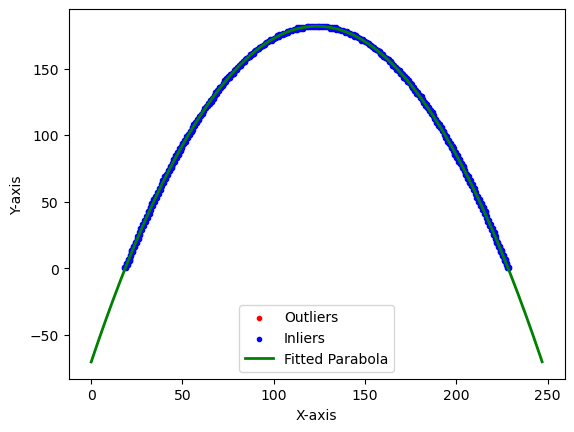

In [22]:
import cv2
import numpy as np
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

image = cv2.imread('images.png', cv2.IMREAD_GRAYSCALE)
image = 255 - image

y, x = np.nonzero(image)
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

ransac = make_pipeline(PolynomialFeatures(2), RANSACRegressor(random_state=42))
ransac.fit(X, y)
ransac_regressor = ransac.named_steps['ransacregressor']
inlier_mask = ransac_regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='.', label='Outliers')
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='.', label='Inliers')
x_range = np.arange(0, image.shape[1], 1)
y_pred = ransac.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='green', linewidth=2, label='Fitted Parabola')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [31]:
poly_model = ransac.named_steps['ransacregressor']
coefficients = poly_model.estimator_.coef_
coefficients

array([[ 0.        ,  4.08387014, -0.01653176]])

# RANSAC to detect multiple parabola

In [37]:
image = cv2.imread('parabolas.png', cv2.IMREAD_GRAYSCALE)

In [38]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

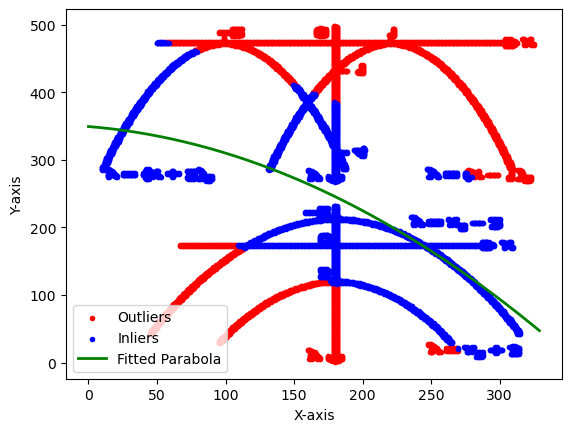

In [41]:

image = cv2.imread('parabolas.png', cv2.IMREAD_GRAYSCALE)
image = 255 - image

y, x = np.nonzero(image)
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

ransac = make_pipeline(PolynomialFeatures(2), RANSACRegressor(random_state=42))
ransac.fit(X, y)
ransac_regressor = ransac.named_steps['ransacregressor']
inlier_mask = ransac_regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='.', label='Outliers')
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='.', label='Inliers')
x_range = np.arange(0, image.shape[1], 1)
y_pred = ransac.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='green', linewidth=2, label='Fitted Parabola')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# Hough

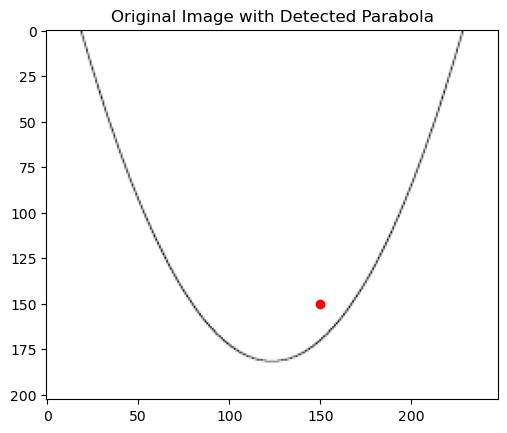

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def houghparabola(Imbinary, centrox, centroy, pmin, pmax):
    vector_p = np.linspace(-pmax, pmax)
    vector_phi = np.linspace(0, 2*np.pi-(2*np.pi/100))
    Accumulator = np.zeros([len(vector_phi), len(vector_p)])

    y, x = np.where(Imbinary)

    # Voting
    for i in range(len(x)):
        for j in range(len(vector_phi)):
            Y = y[i] - centroy
            X = x[i] - centrox
            angulo = vector_phi[j]
            numerador = (Y * np.cos(angulo) - X * np.sin(angulo))**2
            denominador = 4 * (X * np.cos(angulo) + Y * np.sin(angulo))
            if denominador != 0:
                p = numerador / denominador

                if abs(p) > pmin and abs(p) < pmax and p != 0:
                    indice = np.argmax(vector_p >= p)
                    Accumulator[j, indice] += 1

    # Finding local maxima in Accumulator
    maximo = np.max(Accumulator)
    idx_phi, idx_p = np.where(Accumulator == maximo)
    p = vector_p[idx_p[0]]
    phi = vector_phi[idx_phi[0]]

    return phi, p

# Example usage on a color image
image = cv2.imread('images.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = 255 - gray_image

# Define the parameters
centrox = 150
centroy = 150
pmin = 10
pmax = 50

# Threshold the grayscale image to obtain a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Apply the Hough transform
phi, p = houghparabola(binary_image, centrox, centroy, pmin, pmax)

# Visualize the results
plt.imshow(image)
plt.title('Original Image with Detected Parabola')
plt.plot(centrox, centroy, 'ro')  # Plot the vertex
plt.show()


In [37]:
gray_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)